# Homework 4: Emilie Engen, 100356077

Author: Abdelmalik Moujahid -- abdelmalik.moujahid@uc3m.es

Date: March 15, 2017


# Machine Learning

## Session 4: Predicting house prices with GP


The aim of this session is to solve a real data problem using the Gaussian Process implementation of GPy. The documentation of GPy is avaialable from the [SheffieldML github page](https://github.com/SheffieldML/GPy) or from [this page](http://gpy.readthedocs.org/en/latest/). The problem is the prediction of the house prices using the Housing Data Set from  <a href = https://archive.ics.uci.edu/ml/datasets/Housing>  UCI repository</a> that you can also download from scikit learn <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html> here</a>.


### 1. Loading and preparing the data

* Download the dataset
* Divide the dataset into train (400) and test (106) datasets
* Check the range of prices in the train and test datasets

In [38]:
%matplotlib inline
import GPy
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()

In [40]:
X = boston.data
y = np.zeros((506,1))
y[:,0]=boston.target

# Standardize X
X = preprocessing.scale(X)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.212, random_state=0)

In [41]:
print('Range of prices in train set: [',np.min(y_train),',',np.max(y_train),']')
print('Range of prices in test set: [',np.min(y_test),',',np.max(y_test),']')

Range of prices in train set: [ 5.0 , 50.0 ]
Range of prices in test set: [ 5.6 , 50.0 ]


### 2. Setting and optimizing the model

On the training data set:

a) Build a GP regression model based on an exponentiated quadratic covariance function

In [42]:
kernel = GPy.kern.RBF(input_dim=X_train.shape[1], variance=1., lengthscale=2.)

In [43]:
model = GPy.models.GPRegression(X_train,y_train,kernel)

b) Fit the covariance function parameters and noise to the data  

In [44]:
model.constrain_positive()
model.optimize()

In [45]:
print (model)


Name : GP regression
Objective : 1021.6950823237639
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  472.295383993  |      +ve      |        
  rbf.lengthscale          |  4.14170951703  |      +ve      |        
  Gaussian_noise.variance  |  3.69037804366  |      +ve      |        


On the test data set:

c) Plot and evaluate the prediction error using the opmitized parameters

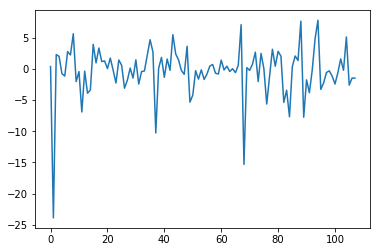

In [46]:
y_pred, v_pred = model.predict(X_test)
error = y_pred-y_test
plt.plot(error);

In [47]:
mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

MSE: 16.4198
Mean error: -0.3857


d) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results.

Construct different kernels

In [48]:
kernel_matern52 = GPy.kern.Matern52(input_dim=X_train.shape[1])
kernel_matern32 = GPy.kern.Matern32(input_dim=X_train.shape[1])
kernel_exp = GPy.kern.Exponential(input_dim=X_train.shape[1])
kernel_linear = GPy.kern.Linear(input_dim=X_train.shape[1])
kernel_bias = GPy.kern.Bias(input_dim=X_train.shape[1])

#### (a) Matern52: Sum of kernels

In [49]:
kernel_sum = kernel + kernel_matern52
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.constrain_positive()
model_sum.optimize()
print (model_sum)


Name : GP regression
Objective : 992.304039989353
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  sum.rbf.variance         |  472.446936318  |      +ve      |        
  sum.rbf.lengthscale      |  11.7605958935  |      +ve      |        
  sum.Mat52.variance       |  51.3663939628  |      +ve      |        
  sum.Mat52.lengthscale    |  2.62153376011  |      +ve      |        
  Gaussian_noise.variance  |  2.14248623233  |      +ve      |        


MSE: 17.8155
Mean error: -0.2855


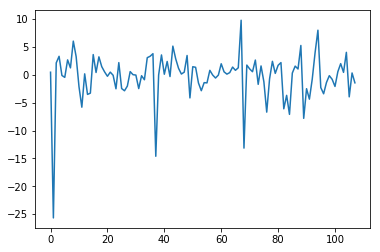

In [50]:
y_pred, v_pred = model_sum.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (b) Matern52: Product of kernels

In [51]:
kernel_prod = kernel * kernel_matern52
model_prod = GPy.models.GPRegression(X_train,y_train,kernel_prod)
model_prod.constrain_positive()
model_prod.optimize()
print (model_prod)


Name : GP regression
Objective : 1002.2054733411727
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  mul.rbf.variance         |   449.928814949  |      +ve      |        
  mul.rbf.lengthscale      |   3843.60541035  |      +ve      |        
  mul.Mat52.variance       |  0.833371125391  |      +ve      |        
  mul.Mat52.lengthscale    |   5.61504086213  |      +ve      |        
  Gaussian_noise.variance  |   2.91557411751  |      +ve      |        


MSE: 16.7986
Mean error: -0.3310


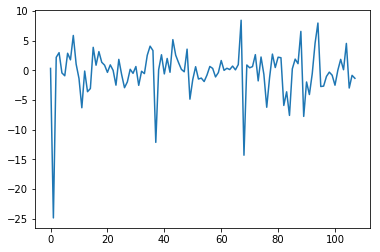

In [52]:
y_pred, v_pred = model_prod.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (c) Matern32: Sum of kernels

In [53]:
kernel_sum = kernel + kernel_matern32
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.constrain_positive()
model_sum.optimize()
print (model_sum)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : 992.043474836772
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  sum.rbf.variance         |  449.954009314  |      +ve      |        
  sum.rbf.lengthscale      |  3843.60555155  |      +ve      |        
  sum.Mat32.variance       |  236.151073172  |      +ve      |        
  sum.Mat32.lengthscale    |  6.12661639022  |      +ve      |        
  Gaussian_noise.variance  |  2.05452929297  |      +ve      |        


MSE: 17.1138
Mean error: -0.2633


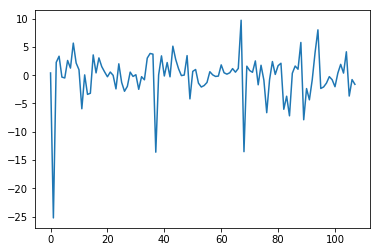

In [54]:
y_pred, v_pred = model_sum.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (d) Matern32: Product of kernels

In [55]:
kernel_prod = kernel * kernel_matern32
model_prod = GPy.models.GPRegression(X_train,y_train,kernel_prod)
model_prod.constrain_positive()
model_prod.optimize()
print (model_prod)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : 994.2311809429891
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  mul.rbf.variance         |  449.925786724  |      +ve      |        
  mul.rbf.lengthscale      |  3843.60541038  |      +ve      |        
  mul.Mat32.variance       |  1.04635948972  |      +ve      |        
  mul.Mat32.lengthscale    |  8.23357204669  |      +ve      |        
  Gaussian_noise.variance  |  2.22745378438  |      +ve      |        


MSE: 16.9495
Mean error: -0.3036


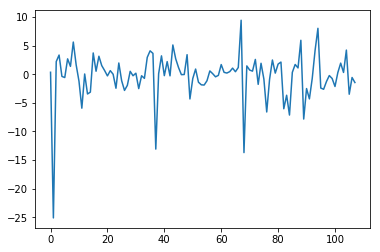

In [56]:
y_pred, v_pred = model_prod.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (e) Exponential: Sum of kernels

In [57]:
kernel_sum = kernel + kernel_exp
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.constrain_positive()
model_sum.optimize()
print (model_sum)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : 1004.0749262595587
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.               |               value  |  constraints  |  priors
  sum.rbf.variance             |     0.0149445985774  |      +ve      |        
  sum.rbf.lengthscale          |       3843.20940166  |      +ve      |        
  sum.Exponential.variance     |       1907.58323831  |      +ve      |        
  sum.Exponential.lengthscale  |       236.355617478  |      +ve      |        
  Gaussian_noise.variance      |  2.74315196059e-282  |      +ve      |        


MSE: 18.2559
Mean error: -0.2733


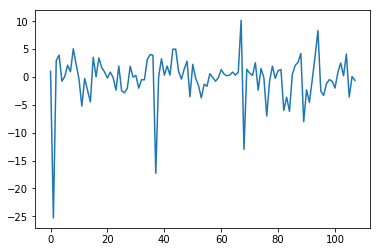

In [58]:
y_pred, v_pred = model_sum.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (f) Exponential: Product of kernels

In [59]:
kernel_prod = kernel * kernel_exp
model_prod = GPy.models.GPRegression(X_train,y_train,kernel_prod)
model_prod.constrain_positive()
model_prod.optimize()
print (model_prod)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : 1004.0739888097276
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.               |              value  |  constraints  |  priors
  mul.rbf.variance             |      432.385129746  |      +ve      |        
  mul.rbf.lengthscale          |      3843.60412391  |      +ve      |        
  mul.Exponential.variance     |      4.42152033465  |      +ve      |        
  mul.Exponential.lengthscale  |      236.876503274  |      +ve      |        
  Gaussian_noise.variance      |  2.96879294997e-26  |      +ve      |        


MSE: 18.2558
Mean error: -0.2733


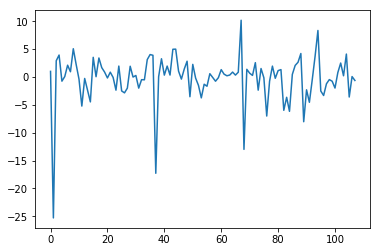

In [60]:
y_pred, v_pred = model_prod.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (g) Linear: Sum of kernels

In [61]:
kernel_sum = kernel + kernel_linear
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.constrain_positive()
model_sum.optimize()
print (model_sum)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : 1188.5607845093555
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  sum.rbf.variance         |  432.389524196  |      +ve      |        
  sum.rbf.lengthscale      |   3843.6041254  |      +ve      |        
  sum.linear.variances     |  3.39505315088  |      +ve      |        
  Gaussian_noise.variance  |   19.989743931  |      +ve      |        


MSE: 33.5177
Mean error: -0.2193


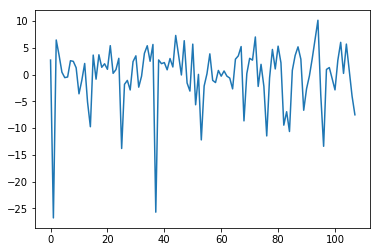

In [62]:
y_pred, v_pred = model_sum.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (h) Linear: Product of kernels

In [63]:
kernel_prod = kernel * kernel_linear
model_prod = GPy.models.GPRegression(X_train,y_train,kernel_prod)
model_prod.constrain_positive()
model_prod.optimize()
print (model_prod)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1



Name : GP regression
Objective : 1425.0454980446962
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  mul.rbf.variance         |       1838.56133812  |      +ve      |        
  mul.rbf.lengthscale      |       3420.93399725  |      +ve      |        
  mul.linear.variances     |       3157.80288113  |      +ve      |        
  Gaussian_noise.variance  |  4.00161024129e-171  |      +ve      |        


MSE: 32.6927
Mean error: -1.6447


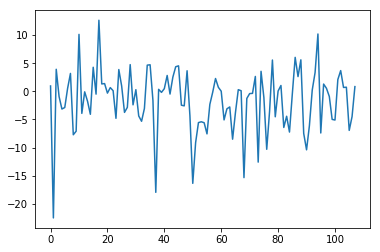

In [64]:
y_pred, v_pred = model_prod.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (i) Bias: Sum of kernels

In [65]:
kernel_sum = kernel + kernel_bias
model_sum = GPy.models.GPRegression(X_train,y_train,kernel_sum)
model_sum.constrain_positive()
model_sum.optimize()
print (model_sum)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/GPy/kern/src/rbf.py:35: RuntimeWarning:overflow encountered in square
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/GPy/kern/src/rbf.py:38: RuntimeWarning:invalid value encountered in multiply
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater



Name : GP regression
Objective : 1455.318925674552
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  sum.rbf.variance         |      1916.75079078  |      +ve      |        
  sum.rbf.lengthscale      |      2943.93590427  |      +ve      |        
  sum.bias.variance        |  4.32699983972e-99  |      +ve      |        
  Gaussian_noise.variance  |      88.3447740573  |      +ve      |        


MSE: 78.2806
Mean error: 0.4841


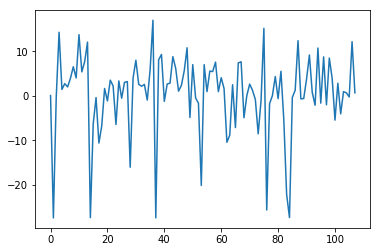

In [66]:
y_pred, v_pred = model_sum.predict(X_test)
error = y_pred-y_test
plt.plot(error)

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

#### (j) Bias: Product of kernels

In [67]:
kernel_prod = kernel * kernel_bias
model_prod = GPy.models.GPRegression(X_train,y_train,kernel_prod)
model_prod.constrain_positive()
model_prod.optimize()
print (model_prod)

 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/GPy/kern/src/rbf.py:35: RuntimeWarning:overflow encountered in square
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/GPy/kern/src/rbf.py:38: RuntimeWarning:invalid value encountered in multiply
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/Emilie/anaconda/envs/py3.2/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater



Name : GP regression
Objective : 1192.5572648091995
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  mul.rbf.variance         |  3098.89650474  |      +ve      |        
  mul.rbf.lengthscale      |  1098.36224622  |      +ve      |        
  mul.bias.variance        |   1137.2196304  |      +ve      |        
  Gaussian_noise.variance  |  19.6630827566  |      +ve      |        


MSE: 33.5766
Mean error: -0.2139


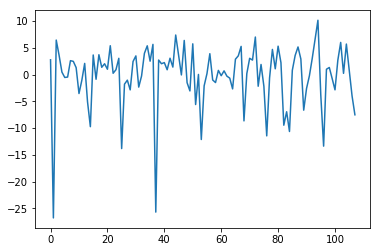

In [68]:
y_pred, v_pred = model_prod.predict(X_test)
error = y_pred-y_test
plt.plot(error);

mse = mean_squared_error(y_pred,y_test)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error))

We have tried to combine different covariance functions with the exponentiated quadratic function previously constructed. In terms of MSE none of the models obtain a lower MSE than the exponentiated quadratic covariance function.

### 3. Leave-one-out CV

Using the whole dataset, employ a LOO-CV to evaluate the prediction error

Caution: optimize only once the kernel parameters, and be concious that this is a lengthy operation

In [70]:
# First optimize the model on the whole dataset
kernel = GPy.kern.RBF(input_dim=X.shape[1], variance=1., lengthscale=2.)
model = GPy.models.GPRegression(X,y,kernel)
model.constrain_positive()
model.optimize()
print(model)


Name : GP regression
Objective : 1343.0701441830793
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |          value  |  constraints  |  priors
  rbf.variance             |  460.671985713  |      +ve      |        
  rbf.lengthscale          |  4.33917405804  |      +ve      |        
  Gaussian_noise.variance  |  5.80067995914  |      +ve      |        


MSE: 8.6299
Mean error: -0.0166


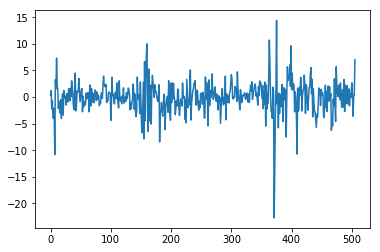

In [71]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X)

error=[]
mse=[]

# Perform LOO-CV
for train_index,test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = GPy.models.GPRegression(X_train,y_train,kernel)
    y_pred, v_pred = model.predict(X_test)
    error.append(y_pred-y_test)
    mse.append(mean_squared_error(y_pred,y_test))

# Plot the error
error_new = np.zeros((506,1))
error_new[:,0]=error
plt.plot(error_new)

# Record the overall error measures
mse = np.mean(mse)
print ("MSE: %.4f" % mse)
print("Mean error: %.4f" % np.mean(error_new))

From the error plot we see that some of the CV predictions leads to a large variance. However, we observe that the overall error is reduced by applying LOO-CV.